Name: `YOUR NAME`

Student ID: `YOUR STUDENT ID`

# Introduction to Neural Networks and Deep Learning

In this notebook, we'll explore the foundations of neural networks and deep learning. You'll learn:
- What neural networks are
- How they work mathematically
- How to implement them from scratch
- How to train them using gradient descent
- How to use deep learning libraries like PyTorch or TensorFlow

## What is a Neural Network?

A neural network is a series of algorithms that attempts to recognize relationships in a dataset through a process that mimics the way the human brain operates.

It consists of:
- Input Layer
- Hidden Layers
- Output Layer

Each layer contains neurons (or units), and each neuron computes a weighted sum of inputs followed by an activation function.

### Plot common activation functions

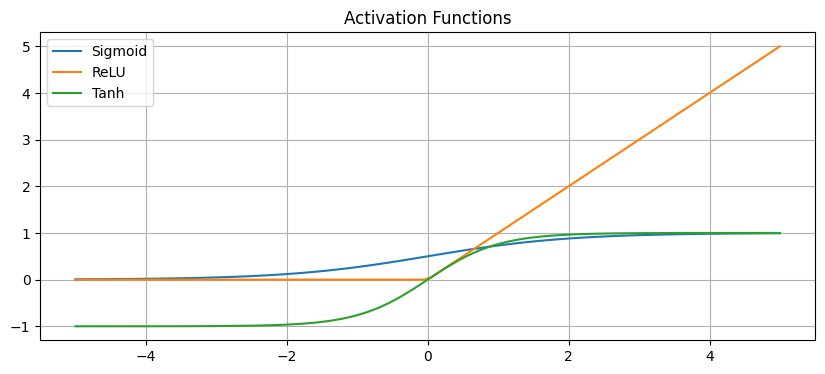

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)

plt.figure(figsize=(10,4))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, tanh(x), label='Tanh')
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

**Question:** What are the advantages and disadvantages of using each of the following activation functions: Sigmoid, ReLU, and Tanh? In which scenarios might one be preferred over the others?

```
Your Answer
```

### Building a Neural Network from Scratch (NumPy)

In [ ]:
# Simple NN with one hidden layer
np.random.seed(42)

# Input and target
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # XOR input
Y = np.array([[0], [1], [1], [0]])

# Initialize weights
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

# Activation
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

# Training
lr = 0.1
for epoch in range(10000):
    # Forward pass
    Z1 = X.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = sigmoid(Z2)

    # Backward pass
    dZ2 = A2 - Y
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = dZ2.dot(W2.T) * sigmoid_deriv(A1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        loss = np.mean((Y - A2)**2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2832
Epoch 1000, Loss: 0.0410
Epoch 2000, Loss: 0.0007
Epoch 3000, Loss: 0.0001
Epoch 4000, Loss: 0.0000
Epoch 5000, Loss: 0.0000
Epoch 6000, Loss: 0.0000
Epoch 7000, Loss: 0.0000
Epoch 8000, Loss: 0.0000
Epoch 9000, Loss: 0.0000


### Test the trained network

In [ ]:
# Final weights and biases
print("\nTrained Weights and Biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

# Inference
def predict(x):
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    return a2

# Predict on all inputs
print("\nPredictions:")
for i in range(len(X)):
    output = predict(X[i:i+1])
    predicted = 1 if output >= 0.5 else 0
    print(f"Input: {X[i]} => Output: {output[0][0]:.4f} => Predicted: {predicted}, True: {Y[i][0]}")



Trained Weights and Biases:
W1: [[ 6.95272873  3.29865812  2.43106617  6.93653752]
 [-5.04853817 -5.97093556  3.67462278  6.6681651 ]]
b1: [[ 2.31254015 -0.91065752 -4.46012657 -2.46936828]]
W2: [[-10.40470085]
 [  8.66132904]
 [ -6.91868899]
 [ 10.78321519]]
b2: [[-1.08033407]]

Predictions:
Input: [0 0] => Output: 0.0007 => Predicted: 0, True: 0
Input: [0 1] => Output: 0.9988 => Predicted: 1, True: 1
Input: [1 0] => Output: 0.9982 => Predicted: 1, True: 1
Input: [1 1] => Output: 0.0022 => Predicted: 0, True: 0


**Question:** Why is the XOR problem not solvable by a single-layer perceptron? What changes in the network architecture make it solvable here?

```
Your Answer
```

### Training with PyTorch or Keras

In [ ]:
# 🔄 XOR Classification in PyTorch with Adjustable Learning Rate and Epochs

import torch
import torch.nn as nn
import torch.optim as optim

# XOR input and output
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=torch.float32)
Y = torch.tensor([[0.],[1.],[1.],[0.]], dtype=torch.float32)

# Hyperparameters (Try changing these for a good fit!)
learning_rate = 0.5
epochs = 50000

# Simple 2-layer network
model = nn.Sequential(
    nn.Linear(2, 4),    # hidden layer with 4 neurons
    nn.Sigmoid(),
    nn.Linear(4, 1),    # output layer
    nn.Sigmoid()
)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs + 1):
    output = model(X)
    loss = criterion(output, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.2503
Epoch 1000, Loss: 0.2493
Epoch 2000, Loss: 0.1491
Epoch 3000, Loss: 0.0084
Epoch 4000, Loss: 0.0032
Epoch 5000, Loss: 0.0019
Epoch 6000, Loss: 0.0013
Epoch 7000, Loss: 0.0010
Epoch 8000, Loss: 0.0008
Epoch 9000, Loss: 0.0007
Epoch 10000, Loss: 0.0006
Epoch 11000, Loss: 0.0005
Epoch 12000, Loss: 0.0005
Epoch 13000, Loss: 0.0004
Epoch 14000, Loss: 0.0004
Epoch 15000, Loss: 0.0003
Epoch 16000, Loss: 0.0003
Epoch 17000, Loss: 0.0003
Epoch 18000, Loss: 0.0003
Epoch 19000, Loss: 0.0003
Epoch 20000, Loss: 0.0002
Epoch 21000, Loss: 0.0002
Epoch 22000, Loss: 0.0002
Epoch 23000, Loss: 0.0002
Epoch 24000, Loss: 0.0002
Epoch 25000, Loss: 0.0002
Epoch 26000, Loss: 0.0002
Epoch 27000, Loss: 0.0002
Epoch 28000, Loss: 0.0002
Epoch 29000, Loss: 0.0002
Epoch 30000, Loss: 0.0001
Epoch 31000, Loss: 0.0001
Epoch 32000, Loss: 0.0001
Epoch 33000, Loss: 0.0001
Epoch 34000, Loss: 0.0001
Epoch 35000, Loss: 0.0001
Epoch 36000, Loss: 0.0001
Epoch 37000, Loss: 0.0001
Epoch 38000, Loss: 0.0001

### Test the trained network

In [ ]:
# Show trained weights and biases
print("\nTrained model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy()}")

# Inference / Prediction
print("\nPredictions:")
with torch.no_grad():
    predictions = model(X)
    for i in range(len(X)):
        pred_val = predictions[i].item()
        pred_label = 1 if pred_val >= 0.5 else 0
        print(f"Input: {X[i].numpy()} => Output: {pred_val:.4f} => Predicted: {pred_label}, True: {int(Y[i].item())}")



Trained model parameters:
0.weight: [[-6.729286   6.758695 ]
 [-4.2788815  4.057818 ]
 [-3.2767596  3.16819  ]
 [-3.4173532  3.3587174]]
0.bias: [ 3.2827196 -2.4646122 -2.117129  -2.2168038]
2.weight: [[-11.198651    5.7613654   4.2070456   4.5875626]]
2.bias: [4.7465773]

Predictions:
Input: [0. 0.] => Output: 0.0091 => Predicted: 0, True: 0
Input: [0. 1.] => Output: 0.9928 => Predicted: 1, True: 1
Input: [1. 0.] => Output: 0.9884 => Predicted: 1, True: 1
Input: [1. 1.] => Output: 0.0077 => Predicted: 0, True: 0


## Classifying Spiral Data with a Neural Network

### Generate the Spiral Dataset

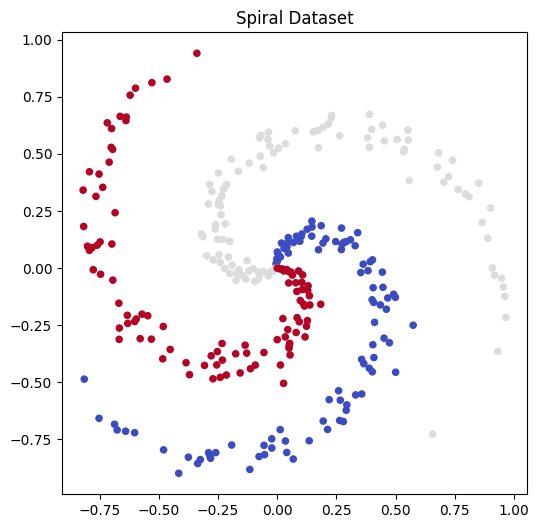

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points=100, n_classes=3):
    X = []
    y = []
    for class_num in range(n_classes):
        ix = range(n_points * class_num, n_points * (class_num + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(class_num * 4, (class_num + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_num] * n_points)
    return np.array(X), np.array(y)

X, y = generate_spiral(n_points=100, n_classes=3)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20)
plt.title("Spiral Dataset")
plt.show()


### Train Neural Network with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3)

model = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        with torch.no_grad():
            test_output = model(X_test)
            pred_labels = torch.argmax(test_output, axis=1)
            acc = (pred_labels == y_test).float().mean()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Test Accuracy: {acc.item():.2f}")


Epoch 0, Loss: 1.0949, Test Accuracy: 0.54
Epoch 100, Loss: 0.0327, Test Accuracy: 0.98
Epoch 200, Loss: 0.0224, Test Accuracy: 0.98
Epoch 300, Loss: 0.0195, Test Accuracy: 0.98
Epoch 400, Loss: 0.0180, Test Accuracy: 0.98
Epoch 500, Loss: 0.0173, Test Accuracy: 0.98
Epoch 600, Loss: 0.0168, Test Accuracy: 0.98
Epoch 700, Loss: 0.0165, Test Accuracy: 0.98
Epoch 800, Loss: 0.0163, Test Accuracy: 0.98
Epoch 900, Loss: 0.0162, Test Accuracy: 0.98


### Visualize Decision Boundary

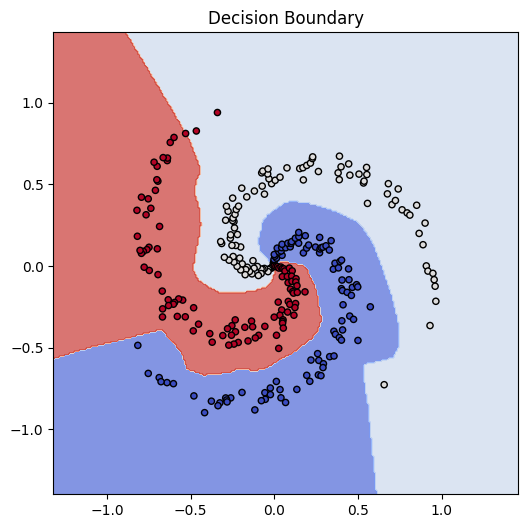

In [ ]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, axis=1).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolors='k')
plt.title("Decision Boundary")
plt.show()


**Question:** How does the choice of optimizer (e.g., SGD vs Adam) influence training speed and final accuracy? Try both and compare.

```
Your Answer
```

## Deeper Classification on MNIST with Keras

### Data Loading and Basic Analysis

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)
Labels (train): [0 1 2 3 4 5 6 7 8 9]


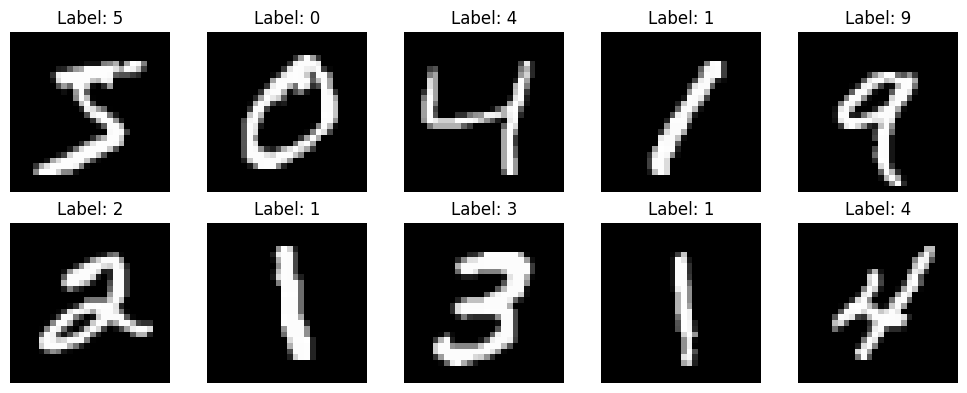

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Show basic info
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Labels (train): {np.unique(y_train)}")

# Plot some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing and One-Hot Encoding

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Define a Deeper Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8606 - loss: 0.4692 - val_accuracy: 0.9608 - val_loss: 0.1223
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9679 - loss: 0.1058 - val_accuracy: 0.9755 - val_loss: 0.0865
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 0.9763 - val_loss: 0.0807
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9842 - loss: 0.0483 - val_accuracy: 0.9770 - val_loss: 0.0824
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9785 - val_loss: 0.0768
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9738 - val_loss: 0.0944
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 0.9758 - val_loss: 0.0956
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9918 - loss: 0.0229 - val_accuracy: 0

### Visualize Training History

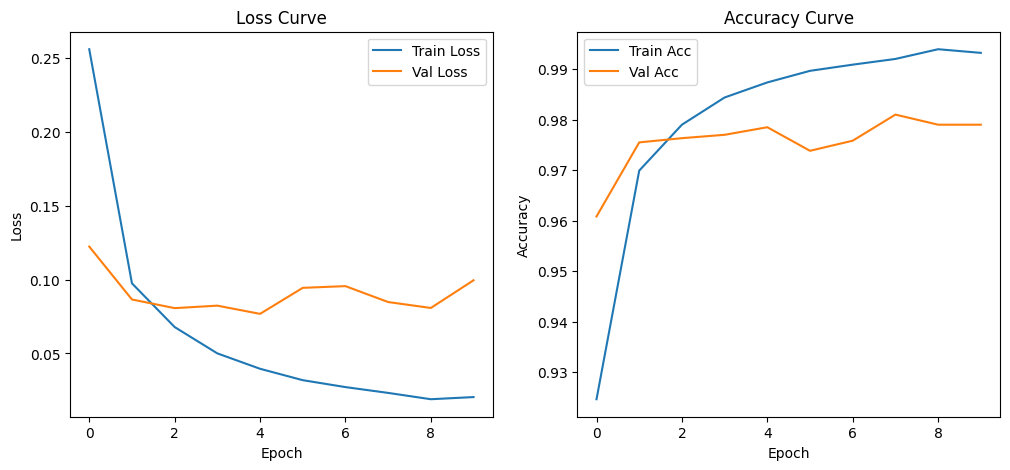

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1062
Test accuracy: 0.9778


### Predict and visualize missclassification

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


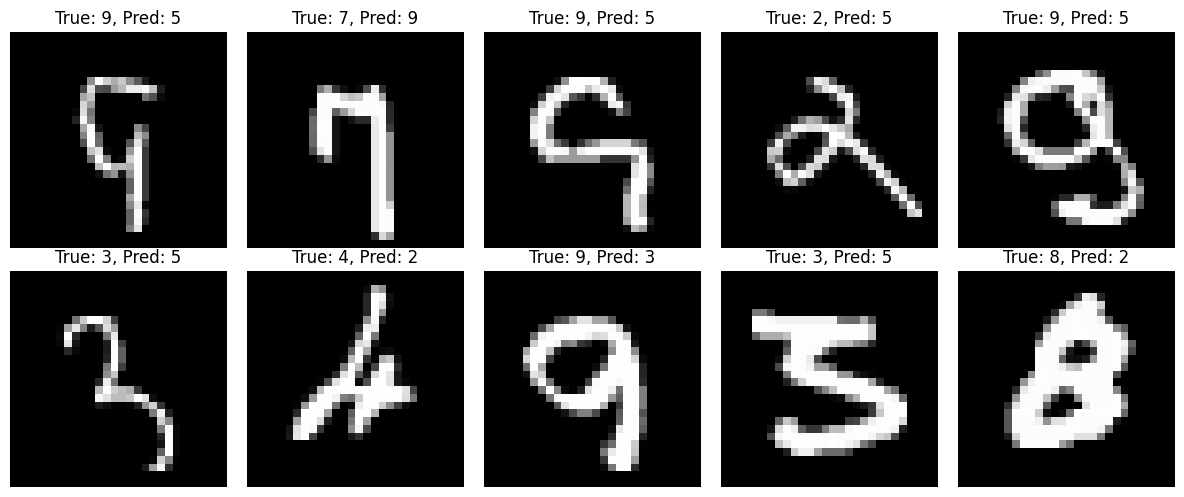

In [ ]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Show a few misclassified examples
misclassified_idxs = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 5))
for i, idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Try with Dropout layers
Add two Dropout layers in right position and with right dropout argument

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.15),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8421 - loss: 0.5258 - val_accuracy: 0.9675 - val_loss: 0.1112
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9615 - loss: 0.1274 - val_accuracy: 0.9702 - val_loss: 0.0982
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9715 - loss: 0.0943 - val_accuracy: 0.9767 - val_loss: 0.0779
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9784 - loss: 0.0700 - val_accuracy: 0.9805 - val_loss: 0.0679
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9818 - loss: 0.0565 - val_accuracy: 0.9775 - val_loss: 0.0753
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9767 - val_loss: 0.0803
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9803 - val_loss: 0.0756
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9873 - loss: 0.0392 - val_accuracy: 0.

### Visualize Training History

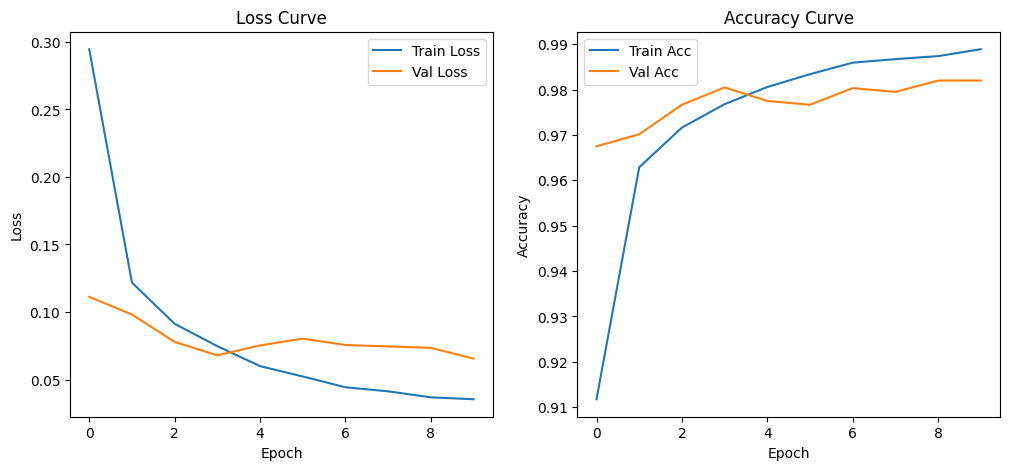

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Evaluate on test set

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0785
Test accuracy: 0.9800


**Question:** What is the role of Dropout in this network? Compare the test accuracy. What do you observe?

```
Your Answer
```